# HACKATHON FINAL TEAM SHGG

### I/ Analyse production mondiale

In [133]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline              
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
# Million Tonnes of Oil Equivalent
from IPython.display import Image

In [153]:
df = pd.read_csv('TEP.csv', header=2)

def clean_data(df):
    df = df.rename(columns={'2000 - 2018 (%/year) ': 'Evolution'})
    #df.nlargest(10, df['Evolution'])
    df.sort_values(by ='Evolution' , ascending=False)
    df = df.drop_duplicates()
    df['Countries']=pd.to_numeric(df.iloc[:,0], errors='ignore')
    df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)
    df=df.set_index('Countries')
    df['Evolution'] = df.Evolution.str[1:].str.replace(',', '.').astype(float)
    df=df[:58]
    df=df.sort_values(by ='Evolution' , ascending=False)
    return df
def clean_data2(df):
    df = df.rename(columns={'2000 - 2018 (points) ': 'Evolution'})
    df.sort_values(by ='Evolution' , ascending=False)
    df = df.drop_duplicates()
    df['Countries']=pd.to_numeric(df.iloc[:,0], errors='ignore')
    df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)
    df=df.set_index('Countries')
    df['Evolution'] = df.Evolution.str[1:].str.replace(',', '.').astype(float)
    df=df[:58]
    df=df.sort_values(by ='2018' , ascending=False)
    return df


df_clean = clean_data(df)

In [100]:
df_clean.head(10)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2017 - 2018 (%),Evolution
Countries,,,,,,,,,,,,,,,,,,,,,
Japan,"76,12","80,12","81,15","88,57","91,44","99,52","102,48","106,81","109,37","104,88",...,"53,87","30,88","30,39","28,98","33,66","37,26","42,28","47,68","12,76",4.35
United Kingdom,"207,99","214,74","214,96","223,41","251,80","257,52","268,92","268,25","271,88","281,57",...,"129,87","116,68","109,55","107,93","118,32","120,06","120,16","123,89","3,11",4.28
Venezuela,"144,75","160,41","161,59","170,56","177,78","192,36","217,04","229,06","226,55","206,26",...,"198,93","194,40","191,71","185,72","183,34","168,41","148,83","111,83","-24,86",3.59
Netherlands,"60,60","67,54","67,58","68,89","66,77","66,90","74,78","66,51","63,92","59,86",...,"66,43","66,11","69,77","60,31","47,94","46,08","41,70","31,25","-25,05",3.42
Mexico,"195,18","203,73","203,08","206,32","205,34","203,89","214,12","225,74","225,88","224,54",...,"216,81","218,60","216,72","208,57","189,64","180,44","165,33","158,41","-4,19",2.01
European Union,"955,18","945,11","933,05","936,86","952,84","967,59","999,79","987,91","960,16","960,98",...,"811,60","803,21","797,76","780,24","773,12","760,82","757,88","753,02","-0,64",1.30
Poland,"104,24","99,98","97,52","97,38","97,90","99,51","102,40","100,01","87,35","83,66",...,"68,44","71,75","71,49","67,90","68,52","67,26","65,81","64,05","-2,68",1.20
Ukraine,"126,60","110,78","104,27","94,68","82,62","77,89","70,63","71,25","70,82","71,55",...,"85,61","85,27","86,24","77,27","64,41","66,17","57,98","58,34","0,61",1.17
Taiwan,"10,65","10,70","10,37","10,27","10,53","10,63","11,18","10,99","11,32","11,70",...,"13,56","13,27","13,54","13,64","12,31","10,86","8,43","9,66","14,69",1.10


In [ ]:
a=np.array(df_clean.loc[['Africa','Asia','America','Europe', 'World']])
n=len(a[0,:-2])
b=[k for k in range(1990,n+1990)]
plt.plot(b,a[0,:-2],'-*',b,a[1,:-2],'-*',b,a[2,:-2],'*',b,a[3,:-2],'*',b,a[4,:-2],'*-')
plt.legend(['Africa','Asia','America','Europe', 'World'])

In [85]:
ds=df_clean.sort_values(by ='Evolution' , ascending=False)
df2018=ds.loc[:,['2000','2018','Evolution']]
df2018.head()

,2000,2018,Evolution
Countries,,,
Japan,"106,17","47,68",4.35
United Kingdom,"272,46","123,89",4.28
Venezuela,"215,80","111,83",3.59
Netherlands,"58,48","31,25",3.42
Mexico,"228,35","158,41",2.01


In [86]:
renewables = pd.read_csv('renewables.csv', header=2)
renewables = renewables.rename(columns={'2000 - 2018 (points) ': 'Evolution'})

renewables.sort_values(by ='Evolution' , ascending=False)
df = renewables.drop_duplicates()
df['Countries']=pd.to_numeric(df.iloc[:,0], errors='ignore')
df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)
df=df.set_index('Countries')
df=df[:58]
#df=df.sort_values(by ='2018' , ascending=False) 
df['2018'] = df['2018'].str[1:].str.replace(',', '.').astype(float)

df2018=df.loc[:,['2000','2018','Evolution']]
df3=df2018.head(10)
df3

,2000,2018,Evolution
Countries,,,
World,"18,82",5.60,"6,8"
OECD,"16,19",6.14,"9,9"
G7,"13,59",4.63,"11,0"
BRICS,"23,34",6.74,"3,4"
Europe,"20,13",6.40,"16,3"
European Union,"14,78",2.72,"17,9"
Belgium,"2,72",3.30,"20,6"
Czech Republic,"3,86",1.90,"8,0"
France,"13,74",9.94,"6,2"


In [69]:
total=df3.loc[:,'2018'].values.sum()
df3['Pourcentage']=df3.loc[:,'2018'].values/total*100
df3.head(10)

/home/savoga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,2000,2018,Evolution,Pourcentage
Countries,,,,
World,"18,82",5.60,"6,8",10.492786
OECD,"16,19",6.14,"9,9",11.504591
G7,"13,59",4.63,"11,0",8.675286
BRICS,"23,34",6.74,"3,4",12.628818
Europe,"20,13",6.40,"16,3",11.991756
European Union,"14,78",2.72,"17,9",5.096496
Belgium,"2,72",3.30,"20,6",6.183249
Czech Republic,"3,86",1.90,"8,0",3.560052
France,"13,74",9.94,"6,2",18.624696


In [70]:
data=df3.loc[:,'Pourcentage']
name=data.index
name=list(name)

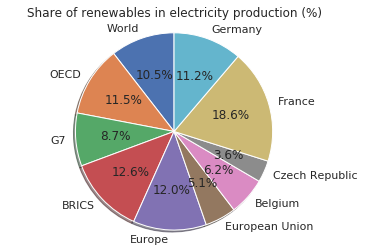

In [71]:
plt.pie(data,labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('Share of renewables in electricity production (%)')
plt.show()

### II/ Analyse consommation mondiale

In [72]:
df = pd.read_csv('Total_energy_consumption.csv', header=2)

df_clean = clean_data(df)
df_clean=df_clean[:58]
df_clean.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2017 - 2018 (%),Evolution
Countries,,,,,,,,,,,,,,,,,,,,,
Ukraine,243.0,244.0,212.0,189.0,161.0,160.0,147.0,140.0,132.0,131.0,...,126.0,122.0,116.0,106.0,93.0,94.0,89.0,88.0,"-1,4",2.1
United Kingdom,206.0,213.0,212.0,214.0,221.0,217.0,226.0,219.0,221.0,222.0,...,189.0,194.0,191.0,180.0,181.0,179.0,177.0,176.0,"-0,9",1.3
Uzbekistan,46.0,48.0,45.0,47.0,47.0,43.0,44.0,45.0,50.0,51.0,...,47.0,48.0,43.0,44.0,39.0,38.0,38.0,40.0,"5,2",1.3
Japan,440.0,445.0,455.0,457.0,483.0,495.0,506.0,511.0,501.0,509.0,...,463.0,453.0,455.0,439.0,432.0,428.0,430.0,424.0,"-1,2",1.1
China,874.0,848.0,877.0,929.0,973.0,1045.0,1074.0,1073.0,1078.0,1099.0,...,2723.0,2821.0,2912.0,2965.0,2994.0,2965.0,3051.0,3164.0,"3,7",0.9


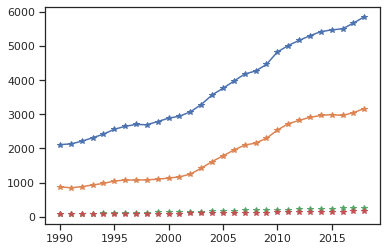

In [73]:
a=np.array(df_clean.loc[['Asia','China','Saudi Arabia','United Arab Emirates']])
n=len(a[0,:-2])
b=[k for k in range(1990,n+1990)]
plt.plot(b,a[0,:-2],'-*',b,a[1,:-2],'-*',b,a[2,:-2],'*',b,a[3,:-2],'*')

Text(0.5, 1.0, 'Evolution par pays')

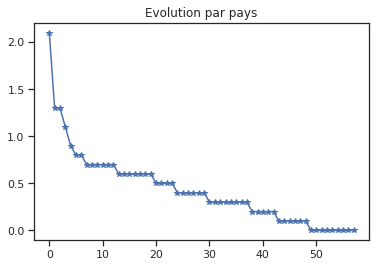

In [74]:
plt.plot(df_clean['Evolution'].values,'-*')
plt.title('Evolution par pays')

In [75]:
x=list(df_clean['Evolution'].values)
y=list(df_clean['Evolution'].index)

([<matplotlib.axis.XTick at 0x7f577a3114a8>,
 <a list of 58 Text xticklabel objects>)

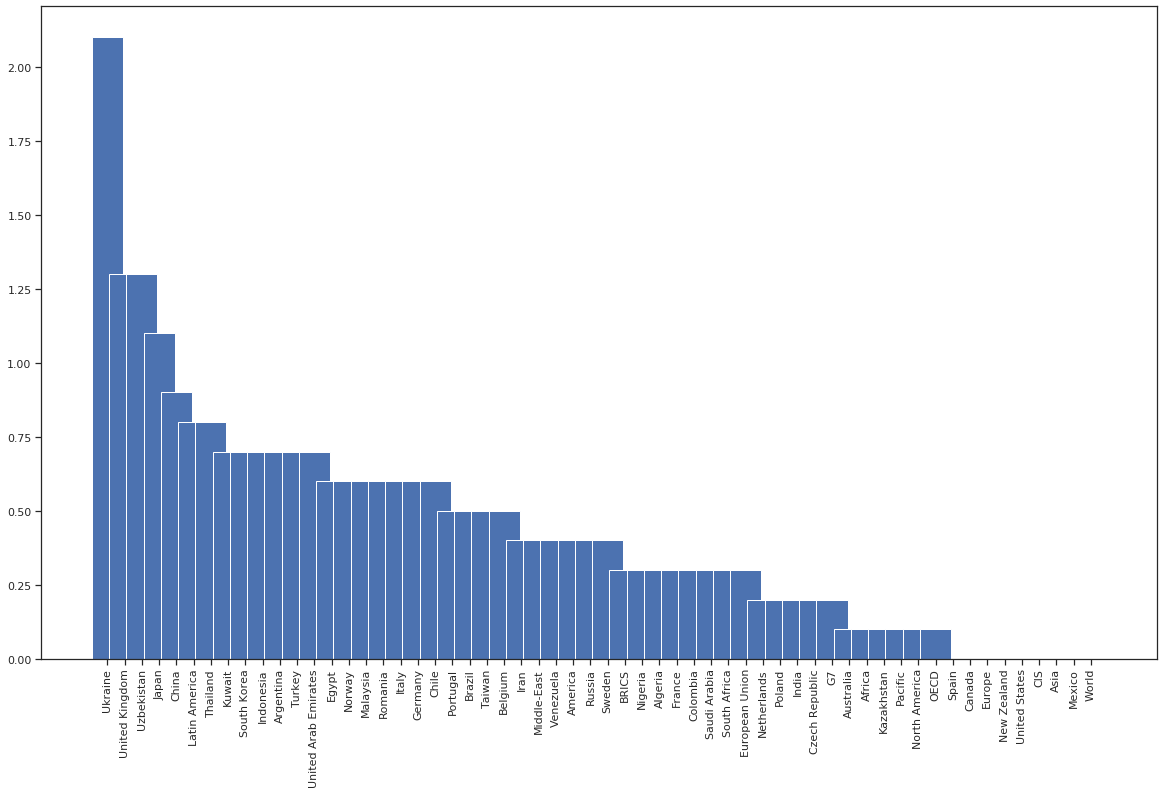

In [76]:
plt.figure(figsize=(20,12))
plt.bar(y,x,width=1.8)
plt.xticks(y,y,rotation='vertical')

### III/ Prévision consommation énergétique pour la région Île de France

#### a) Récupération des populations par ville et par région

In [3]:
import pandas as pd
import itertools
from bs4 import BeautifulSoup
import requests
import sys
import datetime

In [4]:
import sqlite3

conn = sqlite3.connect('region_mapping.db')  # You can create a new database by changing the name within the quotes
c = conn.cursor() # The database will be saved in the location where your 'py' file is saved

In [6]:
df_regions=pd.read_csv("region_cities/regions.csv",error_bad_lines=False,sep=",")
df_departments=pd.read_csv("region_cities/departments.csv",error_bad_lines=False,sep=",")
df_cities=pd.read_csv("region_cities/cities.csv",error_bad_lines=False,sep=",")

In [7]:
print("Region columns:", df_regions.columns)
print("Departments columns:", df_departments.columns)
print("Cities columns:", df_cities.columns)

Region columns: Index(['id', 'code', 'name', 'slug'], dtype='object')
Departments columns: Index(['id', 'region_code', 'code', 'name', 'slug'], dtype='object')
Cities columns: Index(['id', 'department_code', 'insee_code', 'zip_code', 'name', 'slug',
       'gps_lat', 'gps_lng'],
      dtype='object')


In [9]:
#DROP
#c.execute('''DROP TABLE CITY''')
#c.execute('''DROP TABLE DEPARTMENT''')
#c.execute('''DROP TABLE REGION''')
# Create table - CITY
c.execute('''CREATE TABLE CITY
             ([id] INTEGER PRIMARY KEY,[department_code] int, [insee_code] int, [zip_code] int,[name] text,
             [slug] text, [gps_lat] text, [gps_lng] text)''')
          
# Create table - DEPARTMENT
c.execute('''CREATE TABLE DEPARTMENT
             ([id] INTEGER PRIMARY KEY,[region_code] int, [code] int, [name] text, [slug] text)''')
        
# Create table - REGION
c.execute('''CREATE TABLE REGION
             ([id] INTEGER PRIMARY KEY, [code] int, [name] text, [slug] text)''')

conn.commit()

In [10]:
df_regions.to_sql('REGION', conn, if_exists='append', index = False) 
df_cities.to_sql('CITY', conn, if_exists='append', index = False) 
df_departments.to_sql('DEPARTMENT', conn, if_exists='append', index = False) 

In [11]:
c.execute('''SELECT c.name,c.insee_code,r.name FROM CITY c JOIN DEPARTMENT d ON d.id=c.department_code JOIN REGION r ON d.region_code=r.code''')
results = c.fetchall()

In [12]:
df_selection=pd.DataFrame(results)
df_selection.columns=['name','insee','Région']

In [13]:
df_selection['Région'].unique()

array(['Auvergne-Rhône-Alpes', 'Hauts-de-France',
       "Provence-Alpes-Côte d'Azur", 'Grand Est', 'Occitanie',
       'Normandie', 'Nouvelle-Aquitaine', 'Centre-Val de Loire',
       'Bretagne', 'Bourgogne-Franche-Comté', 'Corse', 'Pays de la Loire',
       'Île-de-France'], dtype=object)

In [14]:
df_selection=df_selection[df_selection['Région']=='Île-de-France']
df_selection.head()

,name,insee,Région
29545,Allouville-Bellefosse,76001,Île-de-France
29546,Alvimare,76002,Île-de-France
29547,Ambrumesnil,76004,Île-de-France
29548,Amfreville-la-Mi-Voie,76005,Île-de-France
29549,Amfreville-les-Champs,76006,Île-de-France


The following can be long to compute

In [ ]:
df_selection['pop']=''
for index, row in df_selection.iterrows():
    URL='https://geo.api.gouv.fr/communes/'+ str(row['insee'])
    r = requests.get(url = URL)
    if r.status_code==200:
        data = r.json()
        df_selection['pop'][df_selection['name']==row['name']]=data['population']
    else:
        pass

#### b) Récupération des température historique par ville et prédiction

In [16]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

API_KEY="176d44eb0b0047b08d19c62b252313ad"
website_forecast = "https://api.weatherbit.io/v2.0/forecast/hourly?city="
website_historical="https://api.weatherbit.io/v2.0/history/hourly?city="
city_name="Paris"
start_date="19-10-23"
nb_days=20

def getX_dataFrame(jsonObj):
    col=[]
    data=jsonObj['data']
    for d in data:
        col.append([d['timestamp_local'][-8:], d['temp'], d['wind_spd'], d['clouds']])

    df = pd.DataFrame(col, columns = ['time', 'temp', 'wind', 'clouds'])
    return df

def getHistoricalDataFrame(city_name, start_date, nb_days):
    data=[]
    df=pd.DataFrame(data, columns = ['time', 'temp', 'wind', 'clouds'])
    start_date = datetime.datetime.strptime(start_date, "%y-%m-%d")
    for i in range(nb_days):
        end_date = start_date + datetime.timedelta(days=1)
    
        start_date = start_date.strftime("%y-%m-%d")
        end_date = end_date.strftime("%y-%m-%d")
    
        print("getting data from " + start_date + " to " + end_date)
        res_string = website_historical + city_name + "&start_date=20"+start_date+"&end_date=20"+ end_date +"&tz=local&key="+API_KEY
        res = requests.get(res_string).json()
        df_temp = getX_dataFrame(res)
        df = pd.concat([df, df_temp])
        
        start_date = datetime.datetime.strptime(end_date, "%y-%m-%d")
        time.sleep(1)
    return df

def getForcastDataFrame(city_name):
    res = requests.get(website_forecast + city_name + "&key=" +API_KEY+ "&hours=48").json()
    return getX_dataFrame(res)

df = getHistoricalDataFrame(city_name, start_date, nb_days)


getting data from 19-10-23 to 19-10-24
getting data from 19-10-24 to 19-10-25
getting data from 19-10-25 to 19-10-26
getting data from 19-10-26 to 19-10-27
getting data from 19-10-27 to 19-10-28
getting data from 19-10-28 to 19-10-29
getting data from 19-10-29 to 19-10-30
getting data from 19-10-30 to 19-10-31
getting data from 19-10-31 to 19-11-01
getting data from 19-11-01 to 19-11-02
getting data from 19-11-02 to 19-11-03
getting data from 19-11-03 to 19-11-04
getting data from 19-11-04 to 19-11-05
getting data from 19-11-05 to 19-11-06
getting data from 19-11-06 to 19-11-07
getting data from 19-11-07 to 19-11-08
getting data from 19-11-08 to 19-11-09
getting data from 19-11-09 to 19-11-10
getting data from 19-11-10 to 19-11-11
getting data from 19-11-11 to 19-11-12


In [19]:
df_conso = pd.read_csv("final.csv")

In [98]:
df_conso

,Date,Heure,Région,Consommation brute électricité (MW) - RTE
0,2017-11-23,00:00,Ile-de-France,8619.0
1,2017-11-23,01:00,Ile-de-France,7978.0
2,2017-11-23,02:00,Ile-de-France,7264.0
3,2017-11-23,04:00,Ile-de-France,6812.0
4,2017-11-23,05:00,Ile-de-France,6877.0
5,2017-11-23,06:00,Ile-de-France,7385.0
6,2017-11-23,07:00,Ile-de-France,8662.0
7,2017-11-23,09:00,Ile-de-France,9938.0
8,2017-11-23,11:00,Ile-de-France,9918.0
9,2017-11-23,12:00,Ile-de-France,9910.0


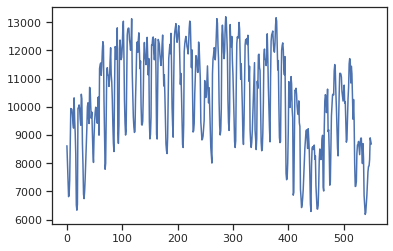

In [99]:
plt.plot(df_conso['Consommation brute électricité (MW) - RTE'])

In [21]:
Y=df_conso['Consommation brute électricité (MW) - RTE']

In [44]:
Y=Y.iloc[:481]

In [ ]:
X=df[['temp', 'wind', 'clouds']]

In [132]:
X

,temp,wind,clouds
0,10.8,6.80,90
1,10.9,6.40,81
2,11.1,6.00,78
3,11.2,5.60,83
4,11.3,6.00,84
5,11.3,6.80,84
6,11.3,6.80,89
7,11.0,6.40,98
8,10.9,6.40,97
9,11.2,6.00,94


In [38]:
X.shape

(481, 3)

Prévision

In [50]:
X_train, X_test = train_test_split(X, test_size=0.2)
Y_train, Y_test = train_test_split(Y, test_size=0.2)

In [46]:
X_train.shape

(384, 3)

In [47]:
Y_train.shape

(384,)

In [53]:
reg = LinearRegression(fit_intercept=True).fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

M=np.ones(len(Y_test))*Y_test.mean()
v1=(Y_pred-M)
nominateur=np.dot(v1,v1)
v2=(Y_test-M)
denominateur=np.dot(v2,v2)
R2=nominateur/denominateur
print("Coefficient de détermination du modèle combiné: R2=%f" % R2)

#X_forecast=getForcastDataFrame(city_name)
#Y_forecast = reg.predict(X_forecast)
print("Consommation prévue:")
#print(Y_forecast)

Coefficient de détermination du modèle combiné: R2=0.005609
Consommation prévue:
